# COMP2200/COMP6200 Assignment 1

Due date: 11:55pm on Sunday April 6th 2025

(Note that daylight savings ends earlier on that day. Remember to move your clock backward by an hour.)

## Scenario

You are working as a data scientist in a venture capital investment firm. You have been given some
data about a potential company to invest in. You will create some models to predict what the 
potential company will be like in 12 months' time.


## About this assignment

This assessment focuses on fundamental statistical analysis, which
will apply linear and logistic regression techniques on one or more
data sets.

The relevant ULO (Unit Learning Outcomes) are:

- Identify the appropriate Data Science analysis for a problem and
  apply that method to the problem.

- Interpret Data Science analyses and summarise and identify the most
  important aspects of a Data Science analysis.

- Present the results of their Data Science analyses both verbally and
  in written form.
  
Total: 15 marks
  

## Submission

Use https://classroom.github.com/a/BdRkY5OH to create a new empty
repository.  Name the GitHub repository `1234567-Assignment1` (replace
`1234567` with your student ID).

Complete this notebook and add it to a new GitHub repository.

Submit this repository via Google Classroom.

Add the video that you create (in the last step) to your GitHub repository.

You don't need to submit your CSV data file, but we won't penalise you
if you do.

## Use of Generative AI

Feel free to use Gen-AI tools (ChatGPT, Anthropic Claude, DeepSeek,
Llama, etc.) to assist you in writing the code. That's what everyone
in industry does nowadays. There are some suggested prompts at the bottom
of this notebook.

Remember that you may be called on to explain what your code does and
how it works, so if you have some code generated for you that you
don't fully understand, spend some time with your Gen-AI tool asking
for clarification until you are confident. Having a personal tutor
guide you is one of the newest and fastest ways to learn to program in
Python, so make the most of the opportunity. 

To help you remember what your code does, you can add comments to your
code either by creating another markdown cell, or by using "#" at the
beginning of a line in a code cell.

Don't use Gen-AI tools for writing reflections and observations. You
will find many cells in this notebook where you need to enter markdown text.
They appear like this:

**Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.**

You don't want to use Gen-AI in these cells for two reasons:

- Thinking and reflecting is how you will get most of the benefit of doing this assignment.

- It will produce meaningless and bland statements (that will be obviously meaningless and bland)
  and you will get bad marks.
  

## Marking Criteria

For a code cell, any working correct answer will earn full marks. For
non-working code, or code that performs a different task, if it seems
like you were on the right track, the marker may issue partial marks.

For code cells that create visualisations, a correct answer is one that
creates a meaningful and useful visualisation of the data.

For a text (markdown) cell, word counts are only a guide: this is how
many words we think it will take to give a good answer. If you need to
use more words, or can express your answer in less words, go ahead: a
good answer will still receive full marks.

Answers given as dot points in a markdown cell are acceptable;
likewise full sentences in paragraphs are acceptable.

## Resources

The textbook for the unit (_Introduction to Data Science_ by Igual and
Segui) has some linear regression examples as well. You might find
Section 6.2.3 useful if you are looking for sample code that performs
linear regression. Section 6.3.1 has an example of logistic
regression.


## Data

You will find a large zip file called `2025-S1-COMP2200-6200-assignment1.zip` on iLearn.  When you expand it
out, you will see many files, including one that begins with your
student number. e.g `1235345 Brown-Miller Group.csv`

Copy it into the same directory as you copied this Jupyter notebook.

### Create a GitHub repo and add it to Google Classroom (0.1 marks)

- Yes, we'll give you 0.1 marks just for getting this far. See the notes about the naming scheme
  for the repository: `1234567-Assignment1`.

### Import any libraries you need (0.1 marks)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # Import train test model to split the dataset to train, validation and test part
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model
from sklearn.linear_model import RANSACRegressor # RANSAC
from sklearn.linear_model import Ridge



If you are doing something exotic --- e.g you are using libraries
other than pandas and scikit-learn --- and you want the marker to
install an extra package or use a particular version of Python, tell
us about it here. Most students will leave this blank.



I used and imported all libraries which will be used in this assignement, I did not use advanced libraries and used most used libraries to analyze and visualize the dataset. As for model and metrics I used only which were covered in practicals of Data Science course. 



### Unzip and Load the Data (0.1 marks)

- Load the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [5]:
df = pd.read_csv("48756997_Santiago-Gonzalez_Ltd.csv")
df.head()

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,39324230.50,13785.19,4.1394,0,Negative
1,2,44855007.89,26170.09,4.4178,0,Negative
2,3,44722425.39,24951.62,4.3971,0,Negative
3,4,44161340.18,40238.30,4.6046,0,Negative
4,5,46912095.96,41251.61,4.6154,0,Negative




### Inspect the Data (0.2 marks)

- List the column names using `df.columns`.



In [7]:
df.columns

Index(['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue',
       'Scandals', 'Media Coverage'],
      dtype='object')



- Explore the data in those columns. Briefly describe each column in one sentence.



In [9]:
df.info() # viewing datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Months_Since_Launch  24 non-null     int64  
 1   Payroll              24 non-null     float64
 2   Revenue              24 non-null     float64
 3   Base_10_Log_Revenue  24 non-null     float64
 4   Scandals             24 non-null     int64  
 5   Media Coverage       24 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB


In [10]:
df["Media Coverage"].unique() # viewing the unique of column

array(['Negative', 'Positive'], dtype=object)

In [11]:
df.isna().sum() # Checking the missing data 

Months_Since_Launch    0
Payroll                0
Revenue                0
Base_10_Log_Revenue    0
Scandals               0
Media Coverage         0
dtype: int64

In [12]:
df.describe() # showing all value of columns

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals
count,24.000000,2.400000e+01,2.400000e+01,24.000000,24.0
mean,12.500000,6.407276e+07,9.344437e+05,5.449233,0.0
std,7.071068,2.320442e+07,1.436365e+06,0.748592,0.0
min,1.000000,3.932423e+07,1.378519e+04,4.139400,0.0
25%,6.750000,5.149349e+07,9.220352e+04,4.962200,0.0
50%,12.500000,5.981957e+07,2.835281e+05,5.441100,0.0
75%,18.250000,7.254575e+07,1.007292e+06,6.001650,0.0
max,24.000000,1.570397e+08,5.109389e+06,6.708400,0.0


In [13]:
df

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,3.932423e+07,13785.19,4.1394,0,Negative
1,2,4.485501e+07,26170.09,4.4178,0,Negative
2,3,4.472243e+07,24951.62,4.3971,0,Negative
3,4,4.416134e+07,40238.30,4.6046,0,Negative
4,5,4.691210e+07,41251.61,4.6154,0,Negative
5,6,5.047250e+07,75604.42,4.8785,0,Negative
6,7,5.282180e+07,104676.08,5.0198,0,Negative
7,8,5.356993e+07,114984.50,5.0606,0,Negative
8,9,5.183382e+07,164658.22,5.2166,0,Negative
9,10,5.738172e+07,97736.55,4.9901,0,Negative


In [14]:
print("Median :", df["Revenue"].median())
print("Mean :", df["Revenue"].mean())
print("Mode :", df["Revenue"].mode())

Median : 283528.095
Mean : 934443.6604166668
Mode : 0       13785.19
1       24951.62
2       26170.09
3       40238.30
4       41251.61
5       75604.42
6       97736.55
7      104676.08
8      114984.50
9      145787.15
10     164658.22
11     219169.82
12     347886.37
13     386741.86
14     541719.40
15     584448.84
16     628796.86
17     957457.39
18    1156796.44
19    2211468.67
20    2279100.45
21    2365967.06
22    4787862.39
23    5109388.57
Name: Revenue, dtype: float64





Suggested word count: ~100 words



First column, Months since launch desribes the the sequences of the working from the first month till twenty four, media_coverage columns have two unique value which are positive and negatvie and this column is categorical. Other columns are numerical, reveneu is the just bunch of number based on the each month as the payroll and also base_10_revenue



### Visualise Payroll Over Time (1 mark)

- Create a line plot clearly showing payroll over months since launch.



<function matplotlib.pyplot.show(close=None, block=None)>

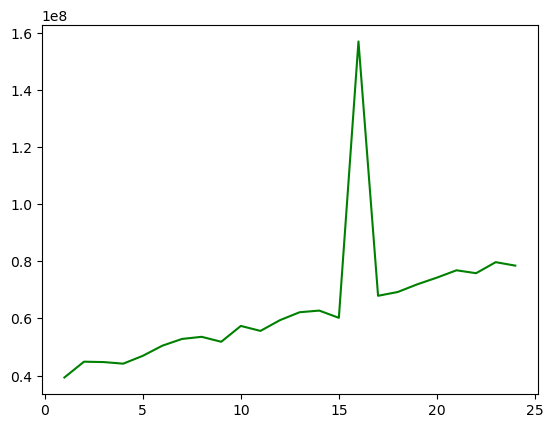

In [27]:
plt.plot(df["Months_Since_Launch"],df["Payroll"], linestyle = "-", color = "g")
plt.show



- Identify and briefly discuss any visible outliers.



In [30]:
df.drop(index=15, inplace=True) # The month since column value 16 is have outliner in payroll column because of that by index 15, value 16 from column month was deleted

<function matplotlib.pyplot.show(close=None, block=None)>

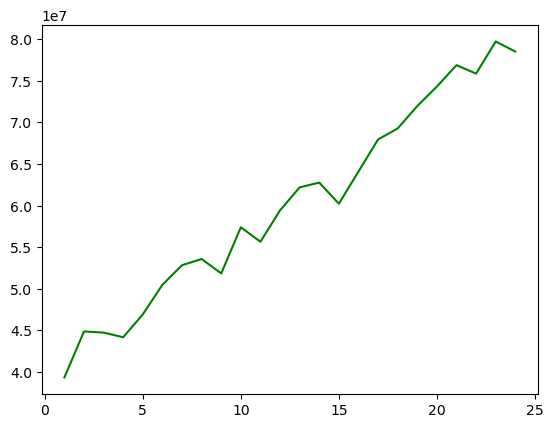

In [32]:
plt.plot(df["Months_Since_Launch"],df["Payroll"], linestyle = "-", color = "g")
plt.show



Suggested word count: ~50 words



As can be seen from the first graph that it is not fully correct linear graph and it is means there is outliner, after viewing the dataset, month columns value 16 and payroll column detected as outliner and dropped the that row, after that graph clearly shows as normal linear. Also by seeing the information (using describe) it can be seen that max and min also mean values and max value is much larger. 



## Linear Regression: Payroll (Total 3 marks)

### Step-by-step breakdown:

- (0.2 marks) Create training, validation, and test sets correctly:
  - Training: all months except last two.
  - Validation: second-last month.
  - Test: last month.
  


In [37]:
encoder = LabelEncoder() # As dataset have only two categorical values in media coverage column, decided using Label encoding
df["Media_Coverage_Encoded"] = encoder.fit_transform(df["Media Coverage"]) # To change the categorical column into numeric
df = df.drop("Media Coverage", axis=1) # Dropping categoric column, new column value 0 is Negatvie and 1 is Positive

In [39]:
df.head()

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media_Coverage_Encoded
0,1,39324230.50,13785.19,4.1394,0,0
1,2,44855007.89,26170.09,4.4178,0,0
2,3,44722425.39,24951.62,4.3971,0,0
3,4,44161340.18,40238.30,4.6046,0,0
4,5,46912095.96,41251.61,4.6154,0,0


In [41]:
train_data = df[df["Months_Since_Launch"] <=22 ]
valid_data = df[df["Months_Since_Launch"] == 23 ] 
test_data = df[df["Months_Since_Launch"] == 24 ]

In [43]:
train_data.head() # To view are we using correct dataset

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media_Coverage_Encoded
0,1,39324230.50,13785.19,4.1394,0,0
1,2,44855007.89,26170.09,4.4178,0,0
2,3,44722425.39,24951.62,4.3971,0,0
3,4,44161340.18,40238.30,4.6046,0,0
4,5,46912095.96,41251.61,4.6154,0,0



  
- (0.5 marks) Train an Ordinary Least Squares (OLS) regressor.



In [46]:
ols = LinearRegression() # model LinearRegression
ols.fit(train_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]], train_data[["Payroll"]]) # Fitting the dataset to model and target

LinearRegression()



- (0.5 marks) Train a robust regressor. Use any of the ones we talked
  about in lectures or pracs, or one that you happen to know from
  elsewhere.



In [49]:
ransac = RANSACRegressor() # model RansacrRegressor
ransac.fit(train_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]], train_data[["Payroll"]]) # Fitting the dataset into model and target

RANSACRegressor()



- (0.5 marks) Clearly identify and justify an appropriate evaluation metric.



In [52]:
y_pred_train_ols = ols.predict(train_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]])
y_pred_train_ols = ransac.predict(train_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]])
r2_train_ols = ols.score(train_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]], train_data[["Payroll"]])
r2_train_ransac = ransac.score(train_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]], train_data[["Payroll"]])
print("R2 Score for OLS : ", r2_train_ols)
print("R2 Score for RANSAC : ", r2_train_ransac)

R2 Score for OLS :  0.9819359252168108
R2 Score for RANSAC :  0.9819359252168108




- (0.5 marks) Evaluate both models using the validation set and state which performed better.



In [55]:
valid_data

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media_Coverage_Encoded
22,23,79722877.82,4787862.39,6.6801,0,1


In [57]:
y_pred_ols = ols.predict(valid_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]])
y_pred_ransac = ransac.predict(valid_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]])
y_pred_ols.shape, y_pred_ransac.shape

((1, 1), (1, 1))

In [59]:
y_pred_ols = y_pred_ols.item()
y_pred_ransac = y_pred_ransac.item()

In [61]:
# For evaluation i can not use R2 score because for validation dataset is contains only one row, because of this I choosen MAE 
# but because of validation data contrains only one row, I will use Absolute Error

In [63]:
absolute_error_ols = abs(valid_data["Payroll"] - y_pred_ols)
absolute_error_ransac = abs(valid_data["Payroll"] - y_pred_ransac)
print("AE OLS : ", absolute_error_ols)
print("AE RANSAC : ",absolute_error_ransac)

AE OLS :  22    3.687905e+06
Name: Payroll, dtype: float64
AE RANSAC :  22    3.687905e+06
Name: Payroll, dtype: float64


In [65]:
absolute_error_ols.mean(),absolute_error_ransac.mean() # Mean Absolute error of both models

(3687904.5350566953, 3687904.5350566953)

From the score of using data OLS showed good score than RANSAC but after using model to predict validation data OLS giving me big abosulte error than RANSAC, beacuse of that I can consider that RANSAC model is more fitted to this prediction. 



- (0.3 marks) Report accuracy of the best-performing model on the test set.



In [70]:
test_prediction = ransac.predict(test_data[["Months_Since_Launch","Revenue","Base_10_Log_Revenue","Scandals","Media_Coverage_Encoded"]])
ae_test = abs(test_data["Payroll"] - test_prediction.item())
pe_test = (ae_test / test_data["Payroll"]) * 100
print("AE test data : ", ae_test)
print("PE test data : ", pe_test) # Percentage error

AE test data :  23    7.051484e+06
Name: Payroll, dtype: float64
PE test data :  23    8.981819
Name: Payroll, dtype: float64




- (0.5 marks) Reflect on and explain why the selected model performed
  better or worse. If it was surprising or expected, explain why.

Suggested word count: ~100 words



At first I thought that OLS model will perform better because RANSAC is more fitted to dataset with a lot of outliners and this dataset is small, in first when I score the model using train data OLS showed good result than RANSAC. But after using model in validation data OLS get very big absolute error than true value and than RANSAC, as the result I choose to use RANSAC model to predict the test data. But still, the resuls of the RANSAC from test prediction is not so good, it got for percentage error 8.9%, then i tried OLS and it get worse than RANSAC so I decided to use only RANSAC for test prediction. Also it may conclude that dataset is small and validation and test data is only one row data and because of this it can not truly show models correction of models. 




### Payroll Prediction (1.5 marks)

- (0.5 marks) Provide your best estimate for payroll in 12 months.



In [75]:
prediction_payroll = pd.DataFrame({
    "Months_Since_Launch": list(range(1, 13)),
    "Revenue": np.random.choice(df['Revenue'].values, size=12, replace=True),
    "Scandals": [0] * 12,
    "Media_Coverage_Encoded": np.random.choice(df['Media_Coverage_Encoded'].values, size=12, replace=True)
})
prediction_payroll['Base_10_Log_Revenue'] = np.log10(prediction_payroll['Revenue'])
revenue_index = prediction_payroll.columns.get_loc('Revenue') # index of column revenue to add after that Base 10 Log Revenue
columns = list(prediction_payroll.columns)  # Columns
columns.insert(revenue_index + 1, columns.pop(-1)) # Inserting Base 10 Log Revenue after Revenue column so order of dataset to be correct as other data
prediction_payroll = prediction_payroll[columns]
prediction_payroll

,Months_Since_Launch,Revenue,Base_10_Log_Revenue,Scandals,Media_Coverage_Encoded
0,1,2211468.67,6.344681,0,1
1,2,386741.86,5.587421,0,0
2,3,219169.82,5.340781,0,1
3,4,40238.30,4.604640,0,1
4,5,40238.30,4.604640,0,0
5,6,4787862.39,6.680142,0,0
6,7,957457.39,5.981119,0,0
7,8,2279100.45,6.357763,0,0
8,9,4787862.39,6.680142,0,1
9,10,347886.37,5.541437,0,0


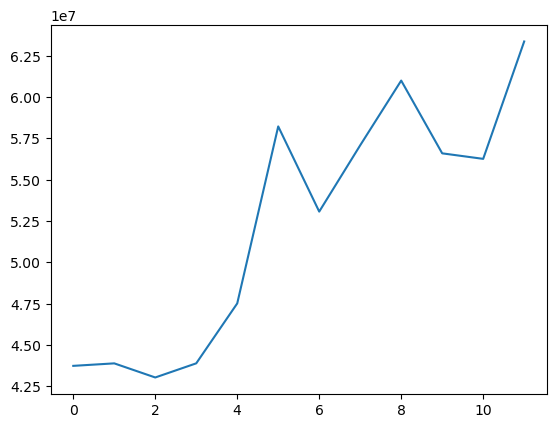

In [161]:
payroll_prediction = ransac.predict(prediction_payroll)
plt.plot(payroll_prediction)

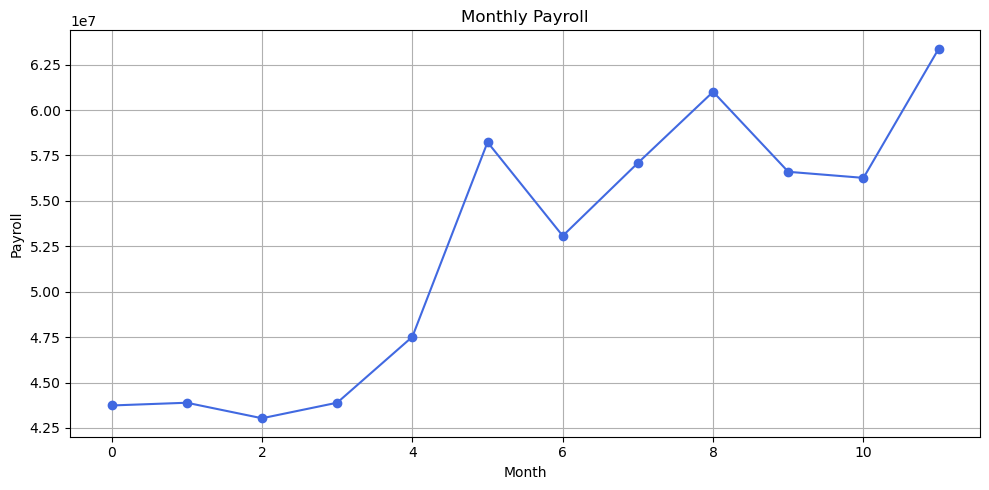

In [167]:
plt.figure(figsize=(10, 5))
plt.plot(payroll_prediction, marker='o', linestyle='-', color='royalblue')
plt.title('Monthly Payroll')
plt.xlabel('Month')
plt.ylabel('Payroll')
plt.grid(True)
plt.tight_layout()
plt.show()



Suggested word count: ~25 words



For prediction of period 12 months, I created the dataset as original to use for prediction, and using the ransac model predicted the payroll for 12 months.



- (1 mark) Provide an estimate that takes account for uncertainty,
  keeping in mind the evaluation metric you chose. If you want to
  calculate additional metrics, you can do that here too.
  


In [82]:
# for estimating the uncertainty i will use test prediction and ransac model
mae = np.mean(ae_test) # I used absolute error so here i will find mean absolute error
lower = test_prediction - mae
upper = test_prediction + mae
lower, upper

(array([[78508418.88]]), array([[92611386.32439673]]))



Suggested word count: ~100 words



Here it was little bit challenging to estimate model uncertainty because I could not decided to choose which predicting to use, then i decided using test prediction but still to correcttly estimate i have research more about that because during the workshop, we used design metrix to estimate uncertainty but here i though i have to use differently. So for the metrics i decided to use mean absolute error because i have already have the value and founded lower bound and upper bound where the outcome can be viewen as the intervals, as i understand it means that true value will be in this intervall. 



## Revenue Visualisation and Transformation (1 mark)

- (0.5 marks) Visualise revenue over time.



<Axes: xlabel='Months_Since_Launch', ylabel='Revenue'>

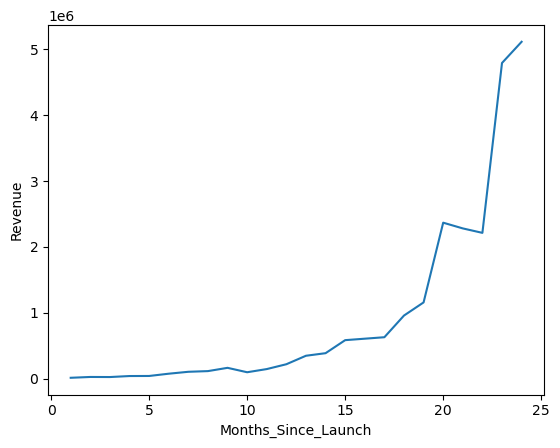

In [87]:
sns.lineplot(x=df["Months_Since_Launch"], y=df["Revenue"], linestyle="-")



- (0.5 marks) Clearly explain why applying a log transformation to revenue may help linear modelling.



<Axes: xlabel='Months_Since_Launch', ylabel='Base_10_Log_Revenue'>

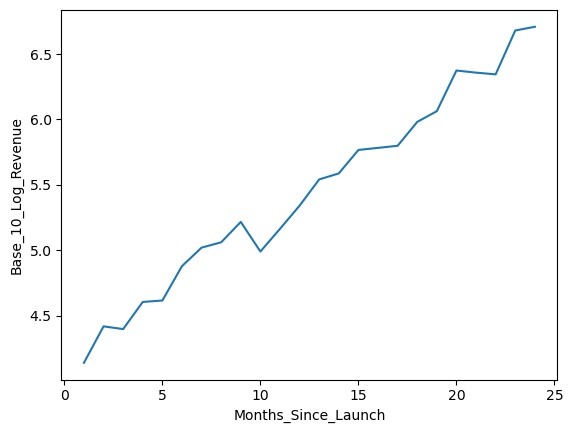

In [90]:
sns.lineplot(x=df["Months_Since_Launch"], y=df["Base_10_Log_Revenue"], linestyle="-")
# In first graph it is clearly shown that it is not linear and numbers are much different and large and becase of that
# i can not use Linear regression models for predicting revenue and r2 score for that was negative
# because of this if the number is different and very big it is recommended to log them
# this graph with log revenue can be seen that it is clearly linear and linearRegression model works on that



## Revenue Modelling (3 marks)

- (0.5 marks) Train a linear regression model (any model you choose) on the original revenue data.



In [93]:
df_re = df
X = df_re.drop(["Revenue","Base_10_Log_Revenue"], axis = 1) # dropping target columns 
y = df_re["Revenue"] # target value to predict "Revenue"
y_log = df_re["Base_10_Log_Revenue"] # target value to predict "Base Log Revenue"

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) # Splitting the data into train and test (for Revenue)

In [97]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X,y_log, test_size = 0.2, random_state = 42) # Splitting the data into train and test (for log Revenue) 

In [99]:
model = Ridge() # Ridge model
model.fit(X_train,y_train) 

Ridge()



- (0.5 marks) Train a linear regression model on the log-transformed revenue data.



In [102]:
model_log = LinearRegression() # model
model_log.fit(X_train_log,y_train_log)

LinearRegression()



- (0.5 marks) Compare both models clearly and identify the better-performing model.



In [105]:
y_pred = model.predict(X_test)
y_pred_log = model_log.predict(X_test_log)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)
print("MSE for Revenue Prediction :", mse)
print("R2 for Revenue Prediction :", r2)
print("MSE for Base Log Revenue Prediction :", mse_log)
print("R2 for Base Log Revenue Prediction :", r2_log)

MSE for Revenue Prediction : 1070723551318.3796
R2 for Revenue Prediction : -4.8176542587382984
MSE for Base Log Revenue Prediction : 0.0297334256594761
R2 for Base Log Revenue Prediction : 0.9343357745249372




Suggested word count: ~25 words



LinearRegression prediction accuracy is much better than Ridge, but in my opinion it is because Ridge model prediction is based on the Revenue and LinearRegression prediction is log revenue because of this R2 score for ridge model is negative. 



- (0.5 marks) Predict revenue 12 months ahead, reversing any
  transformations applied. Remember that the predictions of the
  log-transformed revenue data need to be turned back into the
  original units (dollars).
  


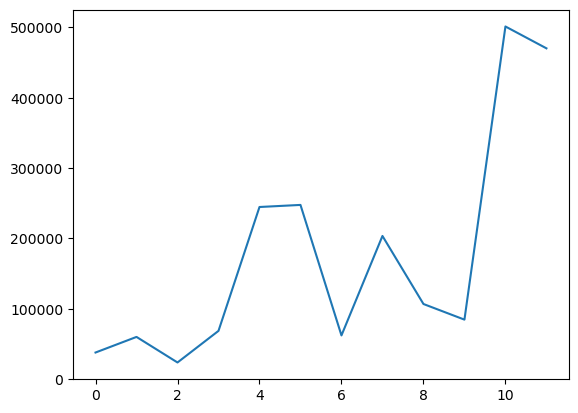

In [159]:
prediction_12 = pd.DataFrame({
    "Months_Since_Launch": list(range(1, 13)),
    "Payroll": np.random.choice(df_re['Payroll'].values, size=12, replace=True),
    "Scandals": [0] * 12,
    "Media_Coverage_Encoded": np.random.choice(df_re['Media_Coverage_Encoded'].values, size=12, replace=True)
}) # Creating new dataframe for 12 months
log_revenue_prediction = model_log.predict(prediction_12)
revenue_prediction = 10 ** log_revenue_prediction # reversing log revenue to original units
plt.plot(revenue_prediction)

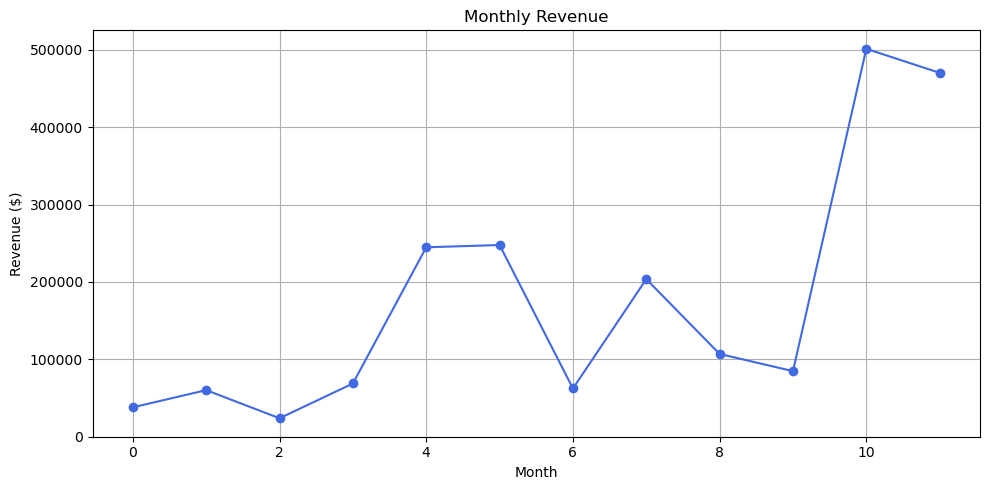

In [163]:
plt.figure(figsize=(10, 5))
plt.plot(revenue_prediction, marker='o', linestyle='-', color='royalblue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()



Suggested word count: ~25 words



To predict revenue 12 months, i have create new dataframe with same data with choosing random variables from original datasets, and reversed the revenue



- (1 mark) Predict revenue 20 years ahead. Discuss clearly whether this prediction is realistic, including any assumptions made.



In [115]:
prediction_240 = pd.DataFrame({
    "Months_Since_Launch": list(range(1, 241)),
    "Payroll": np.random.choice(df_re['Payroll'].values, size=240, replace=True),
    "Scandals": [0] * 240,
    "Media_Coverage_Encoded": np.random.choice(df_re['Media_Coverage_Encoded'].values, size=240, replace=True)
}) # Creating new dataframe for 20 years
log_revenue_prediction = model_log.predict(prediction_240)
revenue_prediction = 10 ** log_revenue_prediction # reversing log revenue to original units
revenue_prediction

array([1.73724458e+05, 1.73999058e+05, 1.98822665e+05, 4.07518534e+04,
       1.41855243e+05, 2.28195408e+05, 7.50261946e+04, 6.19836845e+04,
       1.30553220e+05, 1.14535768e+05, 9.46249366e+04, 8.19466269e+05,
       8.14504091e+05, 4.60283014e+05, 5.29990013e+05, 1.07048951e+06,
       4.07722142e+05, 4.64485572e+05, 3.37900187e+05, 3.89073068e+05,
       1.67245339e+06, 1.28284183e+06, 1.16094259e+06, 4.74447553e+06,
       2.38067521e+06, 1.82607764e+06, 3.38332580e+06, 5.81427099e+06,
       7.83611530e+06, 6.73182175e+06, 1.19438159e+07, 2.11321665e+06,
       3.32042486e+06, 6.00112421e+06, 4.57899598e+06, 4.58711682e+06,
       1.29304311e+07, 2.76669774e+07, 1.56348383e+07, 1.03350471e+07,
       3.92127724e+07, 1.37024408e+07, 1.67975468e+07, 1.02290175e+07,
       2.83075792e+07, 6.42712006e+07, 6.54375533e+07, 3.49950098e+07,
       1.61159777e+08, 5.97225969e+07, 5.34237455e+07, 1.32446578e+08,
       4.08358423e+07, 4.70201766e+07, 1.04529011e+08, 1.39185858e+08,
      



Suggested word count: ~150 words



I did same step for predicting revenue (20 years) for 12 months, created dataset with random variable from getting original dataset. Logically using this kind small datasets and prediction from this dataset is wrong because the data is not enough because we can not predict the sales of 20 years just by analyzing the 24 months data. Also, model will only learn only 24 months sales and because of that prediction of 20 years made only by this data. Model can predict but accuracy of prediction will be very low and model do not have long term patterns in dataset. If we take into account also columns, for example scandals values were only 0, it means it will predict to 20 years 0 but it is wrong. In my opinion, there are should be more features and long term dataset for 10 years then using not only LinearRegression but using other strong models we can predict. 




## Logistic Regression: Predicting Negative Media Coverage (3 marks)

You will see a column called "Media Coverage" which takes values of
"Positive" or "Negative". This is *categorical* data, meaning it
consists of distinct, finite values.

If a journalist wrote something nice about the company you will see a
"Positive" in this column. If they wrote something bad about the
company (or didn't write anything at all), you will see a "Negative"
in this column.

- (0.5 marks) Which features will you use to predict "Media Coverage"?

Suggested word count: ~50 words



All columns is correlated to media coverage, because of this i am thinking using all dataset. But after viewing the dataset, the column Scandals have no impact or correletad to any columns because column value is only 0. Still, I will not drop this column and use full dataset. Secondly media coverage column is categorical column and i will transform it into numeric to work this data and predict because LogisticRegression model does not read categorical data. As for metrcics, I will use accuracy_score. 



- (0.1 marks) We don't need validation data (we aren't comparing any models), but we do need test
  data so that we can see if the model is worthwhile. Randomly select some data to act as test
  data.
  


In [122]:
df_lg = df # Copying dataset into new variable so i can work in this model

In [124]:
df_lg

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media_Coverage_Encoded
0,1,39324230.50,13785.19,4.1394,0,0
1,2,44855007.89,26170.09,4.4178,0,0
2,3,44722425.39,24951.62,4.3971,0,0
3,4,44161340.18,40238.30,4.6046,0,0
4,5,46912095.96,41251.61,4.6154,0,0
5,6,50472501.06,75604.42,4.8785,0,0
6,7,52821795.41,104676.08,5.0198,0,0
7,8,53569930.83,114984.50,5.0606,0,0
8,9,51833815.02,164658.22,5.2166,0,0
9,10,57381722.78,97736.55,4.9901,0,0


In [126]:
X = df_lg.drop("Media_Coverage_Encoded", axis = 1) # dropping for the variable X the column of the target which i will use to predict
y = df_lg["Media_Coverage_Encoded"] # target value to predict

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) # Splitting the data into train and test 


  
- (0.1 marks) Train a logistic regression model on the training (non-test) data



In [131]:
logistic = LogisticRegression() # model
logistic.fit(X_train,y_train) # fitting the model

LogisticRegression()



- (0.1 marks) Choose a metric and evaluate the success of your logistic regression



In [134]:
y_prediction = logistic.predict(X_test) # prediction 
accuracy = accuracy_score(y_test,y_prediction) # from metrics was choosen accuracy 
accuracy

1.0



- (0.1 marks) Examine the coefficients of the logistic regression model that you created.



In [137]:
logistic.coef_

array([[ 7.74790753e-10, -1.51269488e-06,  1.91506620e-04,
        -4.63058923e-11,  0.00000000e+00]])

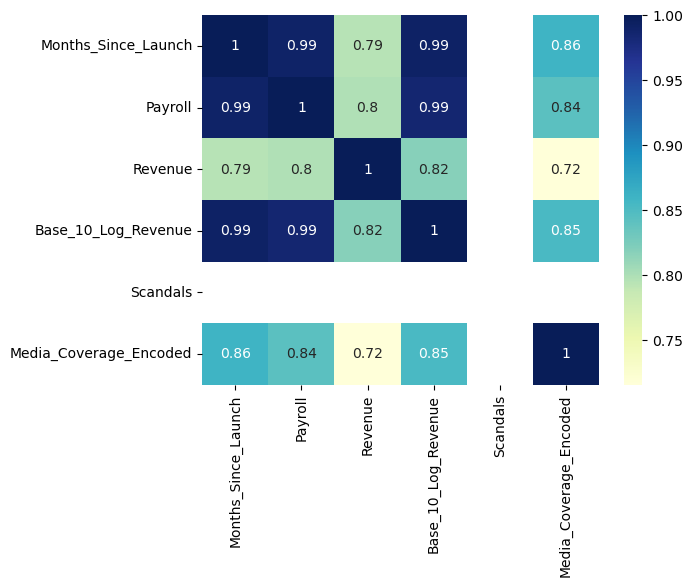

In [139]:
sns.heatmap(df_lg.corr(), cmap="YlGnBu", annot=True) # correlation to find what mostly correlated to media coverage
plt.show()



- (1 mark) Clearly discuss the logistic regression coefficients and
  identify the most influential features contributing to negative
  media coverage.
  
  Suggested word count: ~150 words



In [142]:
logistic.coef_

array([[ 7.74790753e-10, -1.51269488e-06,  1.91506620e-04,
        -4.63058923e-11,  0.00000000e+00]])

Also by coeffiecients of logitic regression model and correlation graph shown, it may concluded that for Scandal column there is no correlation or impact the media coverage and for payroll column value is near of 0 and it also means that there is not big impact of this column to target values of media coverage. But for Revenue column coefficient is positive and it means by increasing the revenue the outcome of media becomes positive. Also for columns month since launch and base 10 log revenue have negative coefficients and it means value of features increase the probability of positive outcome decreases. 



- (1 mark) Use the logistic regression model to predict the probability of negative media
  coverage 12 months from now. Assume that there are no scandals in that month.
  


In [146]:
prediction_media = pd.DataFrame({
    "Months_Since_Launch": list(range(1, 13)),
    "Payroll": np.random.choice(df_lg['Payroll'].values, size=12, replace=True),
    "Revenue": np.random.choice(df_lg['Revenue'].values, size=12, replace=True),
    "Scandals": [0] * 12
}) # As i have to predict for 12 months, i created new dataset as the dataset for 12 months and picked random variables from same column to this dataset
prediction_media['Base_10_Log_Revenue'] = np.log10(prediction_media['Revenue'])
revenue_index = prediction_media.columns.get_loc('Revenue') # index of column revenue to add after that Base 10 Log Revenue
columns = list(prediction_media.columns)  # Columns
columns.insert(revenue_index + 1, columns.pop(-1)) # Inserting Base 10 Log Revenue after Revenue column so order of dataset to be correct as other data
prediction_media = prediction_media[columns]
prediction_media

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals
0,1,78508418.88,13785.19,4.139413,0
1,2,79722877.82,114984.50,5.060639,0
2,3,75857646.65,219169.82,5.340781,0
3,4,51833815.02,386741.86,5.587421,0
4,5,69263341.24,40238.30,4.604640,0
5,6,74299924.08,2365967.06,6.374009,0
6,7,52821795.41,347886.37,5.541437,0
7,8,57381722.78,40238.30,4.604640,0
8,9,44161340.18,1156796.44,6.063257,0
9,10,59418563.26,5109388.57,6.708369,0


In [148]:
prob_negative = logistic.predict_proba(prediction_media)[:, 0] # Used Predict_Proba which helps to get probability of prediction negative

In [150]:
prob_negative = np.mean(prob_negative) # taking the average probability of prediction of negative value for 12 months
print("Average prob of negative media coverage of 12 months :", prob_negative)

Average prob of negative media coverage of 12 months : 0.6655995340058157




Suggested word count: ~25 words



For prediction I created new dataset with same columns and for columns Revenue and Payroll get value random from original dataset, then using Predict_proba predicted probability of negative value for 12 months and the average of probability is 0.66% 



- (0.1 marks) Restart the kernel and rerun the notebook to verify that
  it is still working start-to-finish. Enter the "RESTARTED AND
  CHECKED" in the next cell when you have done this.
  
  Suggested word count: 3 words
  


RESTARTED AND CHECKED 



## Written Summary of Findings (1.5 marks)

- Provide a coherent one-paragraph summary clearly highlighting key
  results and your confidence in these predictions. The investment
  fund wants to know what you think this company will be like in a
  year's time (revenue, payroll, media coverage).
  
Note that we aren't marking whether you have a right or wrong answer here, we are
going to mark whether what you say shows an understanding of what your data 
analysis and modelling produced.

If you want to add any visualisations here, you can.





Suggested word count: ~250 words



By analyzing the dataset and predicting some columns using two models like LinearRegression and LogisticRegression. Using models as RANSAC and OLS regressor i predicted the payroll and by using these models, I understand that score of the model by train data can not be concluded as the result of the model or accuracy because in first I thought OLS have more good value prediction than RANSAC, but after using these models on validation data and test data, RANSAC models values more near the actual value and the percentage error showed 8.9% and OLS showed 52.9%. As for prediction the payroll, prediction for 12 months by this accuracy of the model will be bad. Because the dataset is small and I have only 24 months data. As for prediction revenue, I understand the if the values of column is big number like revenue, it will be more complicated working this kind data and best way is to use replacing them with base 10 log as was did in dataset. Also when creating the graph, if the  values of columns have big number graph will be not properly readble but in other case creating the graph using base 10 log was more readable and understanble. Using LogisticRegression model, I tried to predict the media outcome based on the month since launch. For that in the start of the assigment, using labelencoder i changed the categorical column into numerical so model can read the target. Also i have to take into account that scandal column did not have any correlation with other columns because of this i thought drop this column because it is not needed, but still used for model training. As for prediction the probability of negative value for media for 12 months showed that there is 57% probability that outcome will be negative but we have to still take into account that dataset small and because of this probability accuracy is not fully correct.




## 2-Minute Video Presentation (1.5 marks)

Some of your (non-technical) colleagues in this venture capital firm
are in other timezones, and don't know how to program, so you need to
create a video presentation for them describing your insights.

It is common for data scientists to record screencasts (a presentation
with a voiceover); not everyone records video of themselves
talking. Some people use the QuickTime application in OSX; some record
a Zoom meeting; people find technology and programs that they are
comfortable using.

Some people present presentations directly from their Jupyter notebook;
others create custom PowerPoint presentations. 

So your choices in this section are quite open. 

- (0.5 marks) Submit a video, and ensure the video is in low resolution (SD, 480p)
  so that it is small enough to upload. Keep the time to around 2
  minutes.

- (0.6 marks) State what you believe will happen to this startup over the next 12 months:
  revenue, payroll, positive/negative media coverage. (0.6 marks)
  
- (0.4 marks) Briefly discuss any limitations or assumptions you made
  in your analysis and how they might affect your predictions. Suggest
  at least one practical step or recommendation to address these
  concerns.






## Late Assessment Submission Penalty 

Unless a Special Consideration request has been submitted and
approved, a 5% penalty (of the total possible mark of the task) will
be applied for each day a written report or presentation assessment is
not submitted, up until the 7th day (including weekends). After the
7th day, a grade of ‘0’ will be awarded even if the assessment is
submitted. The submission time for all uploaded assessments is 11:55
pm. A 1-hour grace period will be provided to students who experience
a technical concern. For any late submission of time-sensitive tasks,
such as scheduled tests/exams, performance assessments/presentations,
and/or scheduled practical assessments/labs, please apply for
[Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).

For example, as this assignment is worth 15% of the entire unit, a
submission late by up to 24 hours will incur a penalty of 0.75 marks
(5% of 15 marks). A submission that is late by between 24 and 48 hours
will incur a penalty of 1.5 marks (10% of 15 marks), and so on.

## Sample Gen-AI prompts

Programming prompts:

```
Don't give me the answer directly, but help guide me to answering
this question. I will be programming in Python using the pandas and scikit-learn
libraries. If it appears that I don't know something that I would need to 
answer a question, suggest functions or classes that I should learn about. Always
add little bits of information that will guide my journey.

Here is my code so far, and the question I am trying to answer
(....)
```

If you are concerned about your grammar or language, try a prompt like this:

```
Find any grammatical mistakes, typos or other language errors in this
text. Don't make the corrections, just list for me what was wrong and
explain the problem.
```

